In [1]:
import pandas as pd
from os import path
import numpy as np
import re

from mass import MassConfiguration, MassReaction, MassModel, MassMetabolite, Simulation
from mass.io import json, sbml
from mass.util.expressions import strip_time
from mass.visualization import plot_time_profile

In [2]:
MASSCONFIGURATION = MassConfiguration()
MASSCONFIGURATION.irreversible_Keq = 1e6

In [3]:
# Create a mass model
BASE_model = MassModel("WholeCellRBC_MA_Rates")

Academic license - for non-commercial use only


In [4]:
# Create metabolites
new_mets=[]
new_mets.append(MassMetabolite("_13dpg_c", "3-Phospho-D-glyceroyl phosphate", "C3H4O10P2", -4, "c", fixed=False))
new_mets.append(MassMetabolite('_23dpg_c', '2 3 Disphospho D glycerate C3H3O10P2', 'C3H3O10P2', -5, 'c', fixed=False))
new_mets.append(MassMetabolite('_2kmb_c', '2-keto-4-methylthiobutyrate', 'C5H7O3S', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('_2pg_c', 'D-Glycerate 2-phosphate', 'C3H4O7P', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('_35cgmp_c', "3',5'-Cyclic GMP", 'C10H11N5O7P', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('_35cgmp_e', "3',5'-Cyclic GMP", 'C10H11N5O7P', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('_3pg_c', '3-Phospho-D-glycerate', 'C3H4O7P', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('_5mdr1p_c', '5-Methylthio-5-deoxy-D-ribose 1-phosphate', 'C6H11O7PS', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('_5mdru1p_c', '5-Methylthio-5-deoxy-D-ribulose 1-phosphate', 'C6H11O7PS', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('_5mta_c', '5-Methylthioadenosine', 'C11H15N5O3S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('_5oxpro_c', '5-Oxoproline', 'C5H6NO3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('_5oxpro_e', '5-Oxoproline', 'C5H6NO3', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('_6pgc_c', '6-Phospho-D-gluconate', 'C6H10O10P', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('_6pgl_c', '6-phospho-D-glucono-1,5-lactone', 'C6H9O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('accoa_c', 'Acetyl-CoA', 'C23H34N7O17P3S', -4, 'c', fixed=True))
new_mets.append(MassMetabolite('ade_c', 'Adenine', 'C5H5N5', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ade_e', 'Adenine', 'C5H5N5', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('adn_c', 'Adenosine', 'C10H13N5O4', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('adn_e', 'Adenosine', 'C10H13N5O4', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('adp_c', 'ADP C10H12N5O10P2', 'C10H12N5O10P2', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('ahcys_c', 'S-Adenosyl-L-homocysteine', 'C14H20N6O5S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('akg_c', '2-Oxoglutarate', 'C5H4O5', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('akg_e', '2-Oxoglutarate', 'C5H4O5', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('ala__L_c', 'L-Alanine', 'C3H7NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ala__L_e', 'L-Alanine', 'C3H7NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('amet_c', 'S-Adenosyl-L-methionine', 'C15H23N6O5S', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('ametam_c', 'S-Adenosylmethioninamine', 'C14H24N6O3S', 2, 'c', fixed=False))
new_mets.append(MassMetabolite('amp_c', 'AMP C10H12N5O7P', 'C10H12N5O7P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('arg__L_c', 'L-Arginine', 'C6H15N4O2', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('arg__L_e', 'L-Arginine', 'C6H15N4O2', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('ascb__L_c', 'L-Ascorbate', 'C6H8O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ascb__L_e', 'L-Ascorbate', 'C6H8O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('asn__L_c', 'L-Asparagine', 'C4H8N2O3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('asn__L_e', 'L-Asparagine', 'C4H8N2O3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('atp_c', 'ATP C10H12N5O13P3', 'C10H12N5O13P3', -4, 'c', fixed=False))
new_mets.append(MassMetabolite('band_c', "Band membrane protein (universal, erythrocyte -> 2.1,3,4.1)", 'BaH', 0, 'c', fixed=True))
new_mets.append(MassMetabolite('bandmt_c', "Band membrane protein (methylated, universal, erythrocyte -> 2.1,3,4.1)", 'BaCH3', 0, 'c', fixed=True))
new_mets.append(MassMetabolite('ca2_c', 'Calcium', 'Ca', 2, 'c', fixed=False))
new_mets.append(MassMetabolite('ca2_e', 'Calcium', 'Ca', 2, 'e', fixed=True))
new_mets.append(MassMetabolite('camp_c', 'CAMP C10H11N5O6P', 'C10H11N5O6P', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('camp_e', 'CAMP C10H11N5O6P', 'C10H11N5O6P', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('cit_c', 'Citrate', 'C6H5O7', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('cit_e', 'Citrate', 'C6H5O7', -3, 'e', fixed=True))
new_mets.append(MassMetabolite('cl_c', 'Chloride', 'Cl', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('cl_e', 'Chloride', 'Cl', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('co2_c', 'CO2', 'CO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('co2_e', 'CO2', 'CO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('coa_c', 'Coenzyme A', 'C21H32N7O16P3S', -4, 'c', fixed=True))
new_mets.append(MassMetabolite('cys__L_c', 'L-Cysteine', 'C3H7NO2S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('cys__L_e', 'L-Cysteine', 'C3H7NO2S', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('dhap_c', 'Dihydroxyacetone phosphate', 'C3H5O6P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('dhdascb_c', 'Dehydroascorbate', 'C6H6O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('dhdascb_e', 'Dehydroascorbate', 'C6H6O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('dhmtp_c', "1,2-Dihydroxy-5-(methylthio)pent-1-en-3-one", 'C6H10O3S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('dkmpp_c', "2,3-diketo-5-methylthio-1-phosphopentane", 'C6H9O6PS', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('e4p_c', 'D-Erythrose 4-phosphate', 'C4H7O7P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('f6p_c', 'D-Fructose 6-phosphate', 'C6H11O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('fdp_c', 'D-Fructose 1,6-bisphosphate', 'C6H10O12P2', -4, 'c', fixed=False))
new_mets.append(MassMetabolite('for_c', 'Formate', 'CHO2', -1, 'c', fixed=True))
new_mets.append(MassMetabolite('fru_c', 'D-Fructose', 'C6H12O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('fru_e', 'D-Fructose', 'C6H12O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('fum_c', 'Fumarate', 'C4H2O4', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('fum_e', 'Fumarate', 'C4H2O4', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('g3p_c', 'Glyceraldehyde 3-phosphate', 'C3H5O6P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('g6p_c', 'D-Glucose 6-phosphate', 'C6H11O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('gdp_c', 'GDP C10H12N5O11P2', 'C10H12N5O11P2', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('glc__D_c', 'D-Glucose', 'C6H12O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('glc__D_e', 'D-Glucose', 'C6H12O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('gln__L_c', 'L-Glutamine', 'C5H10N2O3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('gln__L_e', 'L-Glutamine', 'C5H10N2O3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('gluala_e', '5 L Glutamyl L alanine C8H13N2O5', 'C8H13N2O5', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('glucys_c', 'Gamma-L-Glutamyl-L-cysteine', 'C8H13N2O5S', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('glu__L_c', 'L-Glutamate', 'C5H8NO4', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('gly_c', 'Glycine', 'C2H5NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('gly_e', 'Glycine', 'C2H5NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('gmp_c', 'GMP C10H12N5O8P', 'C10H12N5O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('gsn_c', 'Guanosine', 'C10H13N5O5', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('gthox_c', 'Oxidized glutathione', 'C20H30N6O12S2', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('gthox_e', 'Oxidized glutathione', 'C20H30N6O12S2', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('gthrd_c', 'Reduced glutathione', 'C10H16N3O6S', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('gtp_c', 'GTP C10H12N5O14P3', 'C10H12N5O14P3', -4, 'c', fixed=False))
new_mets.append(MassMetabolite('gua_c', 'Guanine', 'C5H5N5O', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('h_c', 'H+', 'H', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('h_e', 'H+', 'H', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('h2o_c', 'H2O', 'H2O', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('h2o_e', 'H2O', 'H2O', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('h2o2_c', 'Hydrogen peroxide', 'H2O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('h2o2_e', 'Hydrogen peroxide', 'H2O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('hco3_c', 'Bicarbonate', 'HCO3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('hco3_e', 'Bicarbonate', 'HCO3', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('hcys__L_c', 'L-Homocysteine', 'C4H9NO2S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('hcys__L_e', 'L-Homocysteine', 'C4H9NO2S', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('his__L_c', 'L-Histidine', 'C6H9N3O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('his__L_e', 'L-Histidine', 'C6H9N3O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('hxan_c', 'Hypoxanthine', 'C5H4N4O', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('hxan_e', 'Hypoxanthine', 'C5H4N4O', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('ile__L_c', 'L-Isoleucine', 'C6H13NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ile__L_e', 'L-Isoleucine', 'C6H13NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('imp_c', 'IMP C10H11N4O8P', 'C10H11N4O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('ins_c', 'Inosine', 'C10H12N4O5', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ins_e', 'Inosine', 'C10H12N4O5', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('k_c', 'Potassium', 'P', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('k_e', 'Potassium', 'P', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('lac__L_c', 'L-Lactate', 'C3H5O3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('lac__L_e', 'L-Lactate', 'C3H5O3', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('leu__L_c', 'L-Leucine', 'C6H13NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('leu__L_e', 'L-Leucine', 'C6H13NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('lys__L_c', 'L-Lysine', 'C6H15N2O2', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('lys__L_e', 'L-Lysine', 'C6H15N2O2', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('mal__L_c', 'L-Malate', 'C4H4O5', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('mal__L_e', 'L-Malate', 'C4H4O5', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('man_c', 'D-Mannose', 'C6H12O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('man_e', 'D-Mannose', 'C6H12O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('man6p_c', 'D-Mannose 6-phosphate', 'C6H11O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('met__L_c', 'L-Methionine', 'C5H11NO2S', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('met__L_e', 'L-Methionine', 'C5H11NO2S', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('na1_c', 'Sodium', 'Na', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('na1_e', 'Sodium', 'Na', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('nad_c', 'Nicotinamide adenine dinucleotide', 'C21H26N7O14P2', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('nadh_c', 'Nicotinamide adenine dinucleotide - reduced', 'C21H27N7O14P2', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('nadp_c', 'Nicotinamide adenine dinucleotide phosphate', 'C21H25N7O17P3', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('nadph_c', 'Nicotinamide adenine dinucleotide phosphate - reduced', 'C21H26N7O17P3', -4, 'c', fixed=False))
new_mets.append(MassMetabolite('nh4_c', 'Ammonium', 'NH4', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('nh4_e', 'Ammonium', 'NH4', 1, 'e', fixed=True))
new_mets.append(MassMetabolite('o2_c', 'O2', 'O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('o2_e', 'O2', 'O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('oaa_c', 'Oxaloacetate', 'C4H2O5', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('orn_c', 'Ornithine', 'C5H13N2O2', 1, 'c', fixed=False))
new_mets.append(MassMetabolite('pep_c', 'Phosphoenolpyruvate', 'C3H2O6P', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('phe__L_c', 'L-Phenylalanine', 'C9H11NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('phe__L_e', 'L-Phenylalanine', 'C9H11NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('phpyr_c', 'Phenylpyruvate', 'C9H7O3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('pi_c', 'phosphate', 'HO4P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('pi_e', 'phosphate', 'HO4P', -2, 'e', fixed=True))
new_mets.append(MassMetabolite('ppi_c', 'Diphosphate', 'HO7P2', -3, 'c', fixed=False))
new_mets.append(MassMetabolite('prpp_c', '5-Phospho-alpha-D-ribose 1-diphosphate', 'C5H8O14P3', -5, 'c', fixed=False))
new_mets.append(MassMetabolite('ptrc_c', 'Putrescine', 'C4H14N2', 2, 'c', fixed=False))
new_mets.append(MassMetabolite('ptrc_e', 'Putrescine', 'C4H14N2', 2, 'e', fixed=True))
new_mets.append(MassMetabolite('pyr_c', 'Pyruvate', 'C3H3O3', -1, 'c', fixed=False))
new_mets.append(MassMetabolite('pyr_e', 'Pyruvate', 'C3H3O3', -1, 'e', fixed=True))
new_mets.append(MassMetabolite('r1p_c', 'Alpha-D-Ribose 1-phosphate', 'C5H9O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('r5p_c', 'Alpha-D-Ribose 5-phosphate', 'C5H9O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('ru5p__D_c', 'D-Ribulose 5-phosphate', 'C5H9O8P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('s7p_c', 'Sedoheptulose 7-phosphate', 'C7H13O10P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('sbt__D_c', 'D-Sorbitol', 'C6H14O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ser__L_c', 'L-Serine', 'C3H7NO3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('ser__L_e', 'L-Serine', 'C3H7NO3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('spmd_c', 'Spermidine', 'C7H22N3', 3, 'c', fixed=False))
new_mets.append(MassMetabolite('spmd_e', 'Spermidine', 'C7H22N3', 3, 'e', fixed=True))
new_mets.append(MassMetabolite('sprm_c', 'Spermine C10H30N4', 'C10H30N4', 4, 'c', fixed=False))
new_mets.append(MassMetabolite('sprm_e', 'Spermine C10H30N4', 'C10H30N4', 4, 'e', fixed=True))
new_mets.append(MassMetabolite('thr__L_c', 'L-Threonine', 'C4H9NO3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('thr__L_e', 'L-Threonine', 'C4H9NO3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('trp__L_c', 'L-Tryptophan', 'C11H12N2O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('trp__L_e', 'L-Tryptophan', 'C11H12N2O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('tyr__L_c', 'L-Tyrosine', 'C9H11NO3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('tyr__L_e', 'L-Tyrosine', 'C9H11NO3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('urate_c', 'Urate C5H4N4O3', 'C5H4N4O3', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('urate_e', 'Urate C5H4N4O3', 'C5H4N4O3', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('urea_c', 'Urea CH4N2O', 'CH4N2O', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('urea_e', 'Urea CH4N2O', 'CH4N2O', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('uri_c', 'Uridine', 'C9H12N2O6', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('uri_e', 'Uridine', 'C9H12N2O6', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('val__L_c', 'L-Valine', 'C5H11NO2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('val__L_e', 'L-Valine', 'C5H11NO2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('xan_c', 'Xanthine', 'C5H4N4O2', 0, 'c', fixed=False))
new_mets.append(MassMetabolite('xan_e', 'Xanthine', 'C5H4N4O2', 0, 'e', fixed=True))
new_mets.append(MassMetabolite('xmp_c', "Xanthosine 5'-phosphate", 'C10H11N4O9P', -2, 'c', fixed=False))
new_mets.append(MassMetabolite('xu5p__D_c', 'D-Xylulose 5-phosphate', 'C5H9O8P', -2, 'c', fixed=False))
BASE_model.add_metabolites(new_mets)

In [5]:
# Assign the initial conditions
mets = BASE_model.metabolites
mets._13dpg_c.ic=0.0003532596280021401
mets._23dpg_c.ic=3.974170816738972
mets._2kmb_c.ic=0.04549501526749580
mets._2pg_c.ic=0.01135206298851554
mets._35cgmp_c.ic=4.469401007555764*10**-6
mets._35cgmp_e.ic=5.500000000000000*10**-6
mets._3pg_c.ic=0.07868102558953934
mets._5mdr1p_c.ic=0.005221043205906681
mets._5mdru1p_c.ic=9.13478515007908*10**-6
mets._5mta_c.ic=0.001637381741029526
mets._5oxpro_c.ic=0.05256501703003371
mets._5oxpro_e.ic=0.02000000000000000
mets._6pgc_c.ic=0.03634303003285367
mets._6pgl_c.ic=0.001724591118360284
mets.accoa_c.ic=0.005000000000000000
mets.ade_c.ic=0.000947164047639456
mets.ade_e.ic=0.001300000000000000
mets.adn_c.ic=0.001181577726385670
mets.adn_e.ic=0.0002000000000000000
mets.adp_c.ic=0.3698262181159110
mets.ahcys_c.ic=0.001389068351325022
mets.akg_c.ic=0.02603921040251165
mets.akg_e.ic=0.007000000000000000
mets.ala__L_c.ic=0.2095820839737436
mets.ala__L_e.ic=0.3200000000000000
mets.amet_c.ic=0.003746910230361765
mets.ametam_c.ic=0.0005078711328676623
mets.amp_c.ic=0.0958678209723057
mets.arg__L_c.ic=0.03999999999999994
mets.arg__L_e.ic=0.07900000000000000
mets.ascb__L_c.ic=0.01852046642145102
mets.ascb__L_e.ic=0.04500000000000000
mets.asn__L_c.ic=0.1210000000000000
mets.asn__L_e.ic=0.06200000000000000
mets.atp_c.ic=1.788580723025522
mets.band_c.ic=1.000000000000000
mets.bandmt_c.ic=1.000000000000000
mets.ca2_c.ic=0.01398107493954468
mets.ca2_e.ic=2.364500000000000
mets.camp_c.ic=0.00001091481459152668
mets.camp_e.ic=8.500000000000000*10**-6
mets.cit_c.ic=0.08867662135446565
mets.cit_e.ic=0.1000000000000000
mets.cl_c.ic=61.80197221030029
mets.cl_e.ic=103.7000000000000
mets.co2_c.ic=0.00002593107394118456
mets.co2_e.ic=0.7000000000000000
mets.coa_c.ic=0.0003500000000000000
mets.cys__L_c.ic=0.02613228450697826
mets.cys__L_e.ic=0.05200000000000000
mets.dhap_c.ic=0.1934633528205940
mets.dhdascb_c.ic=1.022336562634357*10**-6
mets.dhdascb_e.ic=0.00007010000000000000
mets.dhmtp_c.ic=0.0000967089050458353
mets.dkmpp_c.ic=0.00008067482888589282
mets.e4p_c.ic=0.005168332832045605
mets.f6p_c.ic=0.01916507284290878
mets.fdp_c.ic=0.02058119831965632
mets.for_c.ic=0.00008228550000000001
mets.fru_c.ic=0.0002336724054313063
mets.fru_e.ic=0.03100000000000000
mets.fum_c.ic=0.00008216996319913360
mets.fum_e.ic=0.001500000000000000
mets.g3p_c.ic=0.008802617055802014
mets.g6p_c.ic=0.04710056665908308
mets.gdp_c.ic=0.01910679200065942
mets.glc__D_c.ic=5.349864384184065
mets.glc__D_e.ic=5.350000000000000
mets.gln__L_c.ic=0.6289524609774360
mets.gln__L_e.ic=0.5380000000000000
mets.gluala_e.ic=0.0001650000000000000
mets.glucys_c.ic=0.04602068260499785
mets.glu__L_c.ic=0.2550957177445062
mets.gly_c.ic=0.3441486308968465
mets.gly_e.ic=0.2400000000000000
mets.gmp_c.ic=0.1667930460404683
mets.gsn_c.ic=0.3645794449979270
mets.gthox_c.ic=0.1165335104703935
mets.gthox_e.ic=0.001690000000000000
mets.gthrd_c.ic=3.164331894635334
mets.gtp_c.ic=0.08543406018372529
mets.gua_c.ic=0.007830980755048110
mets.h_c.ic=0.00005059476696360102
mets.h_e.ic=0.00003981100000000000
mets.h2o_c.ic=55000.00002522844
mets.h2o_e.ic=55000.00000000000
mets.h2o2_c.ic=2.002081005976196*10**-7
mets.h2o2_e.ic=0.0001000000000000000
mets.hco3_c.ic=12.59669996113626
mets.hco3_e.ic=24.90000000000000
mets.hcys__L_c.ic=0.001964902812201704
mets.hcys__L_e.ic=0.00980000000000000
mets.his__L_c.ic=0.08599999999999999
mets.his__L_e.ic=0.08200000000000000
mets.hxan_c.ic=0.001991873169277454
mets.hxan_e.ic=0.0005999999999999999
mets.ile__L_c.ic=0.05800000000000000
mets.ile__L_e.ic=0.06200000000000000
mets.imp_c.ic=0.01115332501436014
mets.ins_c.ic=0.001118355329159923
mets.ins_e.ic=0.001000000000000000
mets.k_c.ic=165.8066781065473
mets.k_e.ic=4.200000000000000
mets.lac__L_c.ic=1.130202367122641
mets.lac__L_e.ic=1.500000000000000
mets.leu__L_c.ic=0.1100000000000000
mets.leu__L_e.ic=0.1320000000000000
mets.lys__L_c.ic=0.1390000000000000
mets.lys__L_e.ic=0.1670000000000000
mets.mal__L_c.ic=0.002483525535093325
mets.mal__L_e.ic=0.01200000000000000
mets.man_c.ic=0.08428940557179990
mets.man_e.ic=0.03900000000000000
mets.man6p_c.ic=0.01405876985807188
mets.met__L_c.ic=0.01436508118498794
mets.met__L_e.ic=0.02400000000000000
mets.na1_c.ic=9.97219771455134
mets.na1_e.ic=142.6000000000000
mets.nad_c.ic=0.06038633281724509
mets.nadh_c.ic=0.02861366717407611
mets.nadp_c.ic=0.0002033707836570714
mets.nadph_c.ic=0.06579662920961606
mets.nh4_c.ic=0.1980337452335620
mets.nh4_e.ic=0.05040000000000000
mets.o2_c.ic=0.1000010243008056
mets.o2_e.ic=0.1000000000000000
mets.oaa_c.ic=4.752892305968655*10**-8
mets.orn_c.ic=0.1210000000000000
mets.pep_c.ic=0.01433318857592671
mets.phe__L_c.ic=0.04900000000000000
mets.phe__L_e.ic=0.05300000000000000
mets.phpyr_c.ic=0.002623615137177251
mets.pi_c.ic=2.446143006993934
mets.pi_e.ic=0.3791000000000000
mets.ppi_c.ic=0.00003727891946388770
mets.prpp_c.ic=0.005830822229836712
mets.ptrc_c.ic=0.0001046788111762542
mets.ptrc_e.ic=0.0002140000000000000
mets.pyr_c.ic=0.08712102934138201
mets.pyr_e.ic=0.07500000000000000
mets.r1p_c.ic=0.06102969106314410
mets.r5p_c.ic=0.01253359524657143
mets.ru5p__D_c.ic=0.004875390974321567
mets.s7p_c.ic=0.01937874082722468
mets.sbt__D_c.ic=0.1176997316174280
mets.ser__L_c.ic=0.1490000000000000
mets.ser__L_e.ic=0.1220000000000000
mets.spmd_c.ic=0.007365737223925033
mets.spmd_e.ic=0.00938500000000000
mets.sprm_c.ic=0.003170075767703188
mets.sprm_e.ic=0.00997000000000000
mets.thr__L_c.ic=0.1160000000000000
mets.thr__L_e.ic=0.1420000000000000
mets.trp__L_c.ic=0.02400000000000000
mets.trp__L_e.ic=0.04500000000000000
mets.tyr__L_c.ic=0.05900000000000000
mets.tyr__L_e.ic=0.05400000000000000
mets.urate_c.ic=0.01292735526604759
mets.urate_e.ic=0.3000000000000000
mets.urea_c.ic=1.699999999999993
mets.urea_e.ic=6.074600000000000
mets.uri_c.ic=0.003200000000000000
mets.uri_e.ic=0.003100000000000000
mets.val__L_c.ic=0.1710000000000000
mets.val__L_e.ic=0.2350000000000000
mets.xan_c.ic=0.003587794806429677
mets.xan_e.ic=0.001000000000000000
mets.xmp_c.ic=1.214834387539114*10**-6
mets.xu5p__D_c.ic=0.01460685123625522

In [6]:
# Create reactions
rxns = BASE_model.reactions
BASE_model.add_reactions(MassReaction("UNK3", "2-keto-4-methylthiobutyrate transamination", "Methionine Salvage", reversible=True, steady_state_flux=0.04712627528230350))
rxns.UNK3.add_metabolites({
    mets.glu__L_c: -1, 
    mets._2kmb_c: -1,
    mets.akg_c: 1,
    mets.met__L_c: 1
})
BASE_model.add_reactions(MassReaction("ADA", "Adenosine deaminase", "Purine Catabolism", reversible=True, steady_state_flux=0.3392194206556536))
rxns.ADA.add_metabolites({
    mets.adn_c: -1, 
    mets.h_c: -1,
    mets.h2o_c: -1,
    mets.ins_c: 1,
    mets.nh4_c: 1
})
BASE_model.add_reactions(MassReaction("ADEt", "Adenine transport via diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=0.0917184176351321))
rxns.ADEt.add_metabolites({
    mets.ade_e: -1, 
    mets.ade_c: 1
})
BASE_model.add_reactions(MassReaction("ADK1", "Adenylate kinase", "Nucleotides", reversible=True, steady_state_flux=0.4923706262866404))
rxns.ADK1.add_metabolites({
    mets.amp_c: -1, 
    mets.atp_c: -1,
    mets.adp_c: 2
})
BASE_model.add_reactions(MassReaction("ADMDC", "Adenosylmethionine decarboxylase", "Arginine and Proline Metabolism", reversible=True, steady_state_flux=0.04712627528230352))
rxns.ADMDC.add_metabolites({
    mets.amet_c: -1, 
    mets.h_c: -1,
    mets.ametam_c: 1,
    mets.co2_c: 1
})
BASE_model.add_reactions(MassReaction("ADNCYC", "Adenylate cyclase", "Nucleotides", reversible=True, steady_state_flux=0.08064593385747150))
rxns.ADNCYC.add_metabolites({
    mets.atp_c: -1, 
    mets.camp_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("ADNK1", "Adenosine kinase", "Nucleotides", reversible=True, steady_state_flux=0.2285905865453098))
rxns.ADNK1.add_metabolites({
    mets.adn_c: -1, 
    mets.atp_c: -1,
    mets.adp_c: 1,
    mets.amp_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("ADNt", "Adenosine facilated transport in cytosol", "Transport, Extracellular", reversible=True, steady_state_flux=0.3921354485611900))
rxns.ADNt.add_metabolites({
    mets.adn_e: -1, 
    mets.adn_c: 1
})
BASE_model.add_reactions(MassReaction("ADPT", "Adenine phosphoribosyltransferase", "Salvage Pathway", reversible=True, steady_state_flux=0.1388446929174356))
rxns.ADPT.add_metabolites({
    mets.ade_c: -1, 
    mets.prpp_c: -1,
    mets.amp_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("AHCi", "Adenosylhomocysteinase", "Methionine Metabolism", reversible=True, steady_state_flux=0.04228096916543189))
rxns.AHCi.add_metabolites({
    mets.ahcys_c: -1, 
    mets.h2o_c: -1,
    mets.adn_c: 1,
    mets.hcys__L_c: 1
})
BASE_model.add_reactions(MassReaction("ALAt4", "Alanine-Sodium symporter", "Transport, Extracellular", reversible=True, steady_state_flux=0.02792041417023077))
rxns.ALAt4.add_metabolites({
    mets.ala__L_e: -1, 
    mets.na1_e: -1,
    mets.ala__L_c: 1,
    mets.na1_c: 1
})
BASE_model.add_reactions(MassReaction("AMPDA", "Adenosine monophosphate deaminase", "Nucleotides", reversible=True, steady_state_flux=0.1265833098700628))
rxns.AMPDA.add_metabolites({
    mets.amp_c: -1, 
    mets.h_c: -1,
    mets.h2o_c: -1,
    mets.imp_c: 1,
    mets.nh4_c: 1
})
BASE_model.add_reactions(MassReaction("ARD", "1;2-dihydroxy-3-keto-5-methylthiopentene dioxygenase", "Methionine Salvage", reversible=False, steady_state_flux=0.04712627528230351))
rxns.ARD.add_metabolites({
    mets.o2_c: -1, 
    mets.dhmtp_c: -1,
    mets.for_c: 1,
    mets.h_c: 2,
    mets._2kmb_c: 1
})
BASE_model.add_reactions(MassReaction("ARGN", "Arginase", "Urea cycle/amino group metabolism", reversible=True, steady_state_flux=0.4263492948191063))
rxns.ARGN.add_metabolites({
    mets.arg__L_c: -1, 
    mets.h2o_c: -1,
    mets.orn_c: 1,
    mets.urea_c: 1
})
BASE_model.add_reactions(MassReaction("ARGt5r", "ARGtiDF", "Transport, Extracellular", reversible=True, steady_state_flux=0.4263492948191063))
rxns.ARGt5r.add_metabolites({
    mets.arg__L_e: -1, 
    mets.arg__L_c: 1
})
BASE_model.add_reactions(MassReaction("ENOPH", "Enolase-phosphatase E1", "Methionine Salvage", reversible=True, steady_state_flux=0.04712627528230352))
rxns.ENOPH.add_metabolites({
    mets.h2o_c: -1, 
    mets.dkmpp_c: -1,
    mets.pi_c: 1,
    mets.dhmtp_c: 1
})
BASE_model.add_reactions(MassReaction("ASCBt", "L-ascorbate transport via facilitated diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-0.0003600564188266130))
rxns.ASCBt.add_metabolites({
    mets.ascb__L_e: -1, 
    mets.ascb__L_c: 1
})
BASE_model.add_reactions(MassReaction("BANDMT", "Band membrane protein-methyltransferase", "Methionine Metabolism", reversible=True, steady_state_flux=0.04228096916543189))
rxns.BANDMT.add_metabolites({
    mets.band_c: -1,
    mets.amet_c: -1, 
    mets.ahcys_c: 1,
    mets.h_c: 1,
    mets.bandmt_c: 1,
})
BASE_model.add_reactions(MassReaction("CA2t", "Calcium (Ca+2) transport via diffusion (extracellular to periplasm)", "Transport, Extracellular", reversible=True, steady_state_flux=0.2530873361475051))
rxns.CA2t.add_metabolites({
    mets.ca2_e: -1, 
    mets.ca2_c: 1
})
BASE_model.add_reactions(MassReaction("CAATPS", "CAATPS", "Transport, Extracellular", reversible=False, steady_state_flux=0.1265436680737525))
rxns.CAATPS.add_metabolites({
    mets.atp_c: -1, 
    mets.ca2_c: -2,
    mets.h2o_c: -1,
    mets.adp_c: 1,
    mets.pi_c: 1,
    mets.ca2_e: 2,
    mets.h_e: 1
})
BASE_model.add_reactions(MassReaction("CAMPt", "CAMP transport (ATP-dependent)", "Transport, Extracellular", reversible=False, steady_state_flux=0.01805113567060416))
rxns.CAMPt.add_metabolites({
    mets.atp_c: -1, 
    mets.camp_c: -1,
    mets.h2o_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1,
    mets.camp_e: 1
})
BASE_model.add_reactions(MassReaction("CAT", "Catalase", "ROS Detoxification", reversible=True, steady_state_flux=1.735186287841464))
rxns.CAT.add_metabolites({
    mets.h2o2_c: -2, 
    mets.h2o_c: 2,
    mets.o2_c: 1
})
BASE_model.add_reactions(MassReaction("CGMPt", "CGMP transport (ATP-dependent)", "Transport, Extracellular", reversible=False, steady_state_flux=0.01418098184274985))
rxns.CGMPt.add_metabolites({
    mets._35cgmp_c: -1, 
    mets.atp_c: -1,
    mets.h2o_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1,
    mets._35cgmp_e: 1
})
BASE_model.add_reactions(MassReaction("CO2t", "CO2 transporter via diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=0.3570502275151666))
rxns.CO2t.add_metabolites({
    mets.co2_e: -1, 
    mets.co2_c: 1
})
BASE_model.add_reactions(MassReaction("CYStec", "L-cysteine transport via diffusion (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0.05282320245485167))
rxns.CYStec.add_metabolites({
    mets.cys__L_e: -1, 
    mets.cys__L_c: 1
})
BASE_model.add_reactions(MassReaction("DHAAt1r", "Dehydroascorbate transport (uniport)", "Transport, Extracellular", reversible=True, steady_state_flux=0.0003600564188266130))
rxns.DHAAt1r.add_metabolites({
    mets.dhdascb_e: -1, 
    mets.dhdascb_c: 1
})
BASE_model.add_reactions(MassReaction("DM_nadh", "Demand NADH", "", reversible=False, steady_state_flux=2.107050005771889))
rxns.DM_nadh.add_metabolites({
    mets.nadh_c: -1, 
    mets.h_c: 1,
    mets.nad_c: 1
})
BASE_model.add_reactions(MassReaction("DPGM", "Diphosphoglyceromutase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=0.5113641648637322))
rxns.DPGM.add_metabolites({
    mets._13dpg_c: -1, 
    mets.h_c: 1,
    mets._23dpg_c: 1
})
BASE_model.add_reactions(MassReaction("DPGase", "Diphosphoglycerate phosphatase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=0.5113641648637339))
rxns.DPGase.add_metabolites({
    mets.h2o_c: -1, 
    mets._23dpg_c: -1,
    mets._3pg_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("ENO", "Enolase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=3.532241067137616))
rxns.ENO.add_metabolites({
    mets._2pg_c: -1, 
    mets.h2o_c: 1,
    mets.pep_c: 1
})
BASE_model.add_reactions(MassReaction("FBA", "Fructose-bisphosphate aldolase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.673780539897670))
rxns.FBA.add_metabolites({
    mets.fdp_c: -1, 
    mets.dhap_c: 1,
    mets.g3p_c: 1
})
BASE_model.add_reactions(MassReaction("FRUt1r", "D-fructose transport in via uniport", "Transport, Extracellular", reversible=True, steady_state_flux=0.0959413617941332))
rxns.FRUt1r.add_metabolites({
    mets.fru_e: -1, 
    mets.fru_c: 1
})
BASE_model.add_reactions(MassReaction("G6PDH2r", "Glucose 6-phosphate dehydrogenase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.2739722730367791))
rxns.G6PDH2r.add_metabolites({
    mets.g6p_c: -1, 
    mets.nadp_c: -1,
    mets._6pgl_c: 1,
    mets.nadph_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("GAPD", "Glyceraldehyde-3-phosphate dehydrogenase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=3.532241067137615))
rxns.GAPD.add_metabolites({
    mets.g3p_c: -1, 
    mets.nad_c: -1,
    mets.pi_c: -1,
    mets._13dpg_c: 1,
    mets.h_c: 1,
    mets.nadh_c: 1
})
BASE_model.add_reactions(MassReaction("GGLUCT", "Gamma-glutamylcyclotransferase", "Glutathione Metabolism", reversible=True, steady_state_flux=0.02613320124493619))
rxns.GGLUCT.add_metabolites({
    mets.gluala_e: -1, 
    mets.ala__L_c: 1,
    mets._5oxpro_c: 1
})
BASE_model.add_reactions(MassReaction("GK1", "Guanylate kinase (GMP:ATP)", "Nucleotides", reversible=True, steady_state_flux=0.07824338624699832))
rxns.GK1.add_metabolites({
    mets.atp_c: -1, 
    mets.gmp_c: -1,
    mets.adp_c: 1,
    mets.gdp_c: 1
})
BASE_model.add_reactions(MassReaction("GLCt1", "Glucose transport uniport", "Transport, Extracellular", reversible=True, steady_state_flux=1.474264704202533))
rxns.GLCt1.add_metabolites({
    mets.glc__D_e: -1, 
    mets.glc__D_c: 1
})
BASE_model.add_reactions(MassReaction("GLNS", "Glutamine synthetase", "Glutamate metabolism", reversible=True, steady_state_flux=0.1300810557974588))
rxns.GLNS.add_metabolites({
    mets.atp_c: -1, 
    mets.glu__L_c: -1,
    mets.nh4_c: -1,
    mets.adp_c: 1,
    mets.gln__L_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("GLNt4", "L-glutamine reversible transport via sodium symport", "Transport, Extracellular", reversible=True, steady_state_flux=0.1384245797004417))
rxns.GLNt4.add_metabolites({
    mets.gln__L_e: -1, 
    mets.na1_e: -1,
    mets.gln__L_c: 1,
    mets.na1_c: 1
})
BASE_model.add_reactions(MassReaction("GLUCYS", "Gamma-glutamylcysteine synthetase", "Glutathione Metabolism", reversible=True, steady_state_flux=0.2069791502792352))
rxns.GLUCYS.add_metabolites({
    mets.atp_c: -1, 
    mets.cys__L_c: -1,
    mets.glu__L_c: -1,
    mets.adp_c: 1,
    mets.glucys_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("GLYt7_211_r", "GLYt7 LPAREN 211 RPAREN r", "Transport, Extracellular", reversible=True, steady_state_flux=0.05282320245485166))
rxns.GLYt7_211_r.add_metabolites({
    mets.cl_e: -1, 
    mets.gly_e: -1,
    mets.na1_e: -2,
    mets.cl_c: 1,
    mets.gly_c: 1,
    mets.na1_c: 2
})
BASE_model.add_reactions(MassReaction("GMPR", "GMP reductase", "Nucleotides", reversible=True, steady_state_flux=0.04381818783216657))
rxns.GMPR.add_metabolites({
    mets.gmp_c: -1, 
    mets.h_c: -2,
    mets.nadph_c: -1,
    mets.imp_c: 1,
    mets.nadp_c: 1,
    mets.nh4_c: 1
})
BASE_model.add_reactions(MassReaction("GMPS2", "GMP synthase", "Nucleotides", reversible=True, steady_state_flux=0.05799916967491660))
rxns.GMPS2.add_metabolites({
    mets.atp_c: -1, 
    mets.gln__L_c: -1,
    mets.h2o_c: -1, 
    mets.xmp_c: -1,
    mets.amp_c: 1,
    mets.glu__L_c: 1,
    mets.gmp_c: 1,
    mets.h_c: 2,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("GND", "Phosphogluconate dehydrogenase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.2739722730367790))
rxns.GND.add_metabolites({
    mets._6pgc_c: -1, 
    mets.nadp_c: -1,
    mets.co2_c: 1,
    mets.nadph_c: 1,
    mets.ru5p__D_c: 1
})
BASE_model.add_reactions(MassReaction("GTHDH", "Glutathione dehydrogenase (dehydroascorbate reductase)", "Ascorbate and Aldarate Metabolism", reversible=True, steady_state_flux=0.0003600564188266131))
rxns.GTHDH.add_metabolites({
    mets.gthrd_c: -2, 
    mets.dhdascb_c: -1,
    mets.gthox_c: 1,
    mets.ascb__L_c: 1
})
BASE_model.add_reactions(MassReaction("GTHOr", "Glutathione oxidoreductase", "Glutamate metabolism", reversible=True, steady_state_flux=0.3161924032965422))
rxns.GTHOr.add_metabolites({
    mets.gthox_c: -1, 
    mets.h_c: -1,
    mets.nadph_c: -1,
    mets.gthrd_c: 2,
    mets.nadp_c: 1
})
BASE_model.add_reactions(MassReaction("GTHOXti2", "Oxidized glutathione irreversible active transport (rbc)", "Transport, Extracellular", reversible=True, steady_state_flux=0.02641160122742587))
rxns.GTHOXti2.add_metabolites({
    mets.atp_c: -1, 
    mets.gthox_c: -1,
    mets.h2o_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1,
    mets.gthox_e: 1
})
BASE_model.add_reactions(MassReaction("GTHPi", "Glutathione peridoxase", "Glutathione Metabolism", reversible=True, steady_state_flux=0.3422439481051416))
rxns.GTHPi.add_metabolites({
    mets.gthrd_c: -2, 
    mets.h2o2_c: -1,
    mets.gthox_c: 1,
    mets.h2o_c: 2
})
BASE_model.add_reactions(MassReaction("GTHS", "Glutathione synthetase", "Glutathione Metabolism", reversible=False, steady_state_flux=0.05282320245485166))
rxns.GTHS.add_metabolites({
    mets.atp_c: -1, 
    mets.glucys_c: -1,
    mets.gly_c: -1,
    mets.adp_c: 1,
    mets.gthrd_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("GUACYC", "Guanylate cyclase", "Nucleotides", reversible=True, steady_state_flux=0.07824338624699827))
rxns.GUACYC.add_metabolites({
    mets.gtp_c: -1, 
    mets._35cgmp_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("GUAPRT", "Guanine phosphoribosyltransferase", "Salvage Pathway", reversible=True, steady_state_flux=0.05955712532929722))
rxns.GUAPRT.add_metabolites({
    mets.gua_c: -1, 
    mets.prpp_c: -1,
    mets.gmp_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("H2O2t", "Hydrogen peroxide transport via diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=3.672968889389469))
rxns.H2O2t.add_metabolites({
    mets.h2o2_e: -1, 
    mets.h2o2_c: 1
})
BASE_model.add_reactions(MassReaction("H2Ot", "H2O transport via diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-1.635792468732689))
rxns.H2Ot.add_metabolites({
    mets.h2o_e: -1, 
    mets.h2o_c: 1
})
BASE_model.add_reactions(MassReaction("HCO3E", "HCO3 equilibration reaction", "Miscellaneous", reversible=True, steady_state_flux=1.105080165406847))
rxns.HCO3E.add_metabolites({
    mets.co2_c: -1, 
    mets.h2o_c: -1,
    mets.h_c: 1,
    mets.hco3_c: 1
})
BASE_model.add_reactions(MassReaction("HCO3_CLt", "Bicarbonate transport (Cl-/HCO3- exchange)", "Transport, Extracellular", reversible=True, steady_state_flux=-1.105080165406857))
rxns.HCO3_CLt.add_metabolites({
    mets.cl_c: -1, 
    mets.hco3_e: -1,
    mets.hco3_c: 1,
    mets.cl_e: 1
})
BASE_model.add_reactions(MassReaction("HCYSte", "Homocysteine transport (extracellular)", "Transport, Extracellular", reversible=True, steady_state_flux=-0.04228096916543187))
rxns.HCYSte.add_metabolites({
    mets.hcys__L_e: -1, 
    mets.hcys__L_c: 1
})
BASE_model.add_reactions(MassReaction("HEX1", "Hexokinase (D-glucose:ATP)", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.286330749257252))
rxns.HEX1.add_metabolites({
    mets.atp_c: -1, 
    mets.glc__D_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.g6p_c: 1
})
BASE_model.add_reactions(MassReaction("HEX4", "Hexokinase (D-mannose:ATP)", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.008186772253685916))
rxns.HEX4.add_metabolites({
    mets.atp_c: -1, 
    mets.man_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.man6p_c: 1
})
BASE_model.add_reactions(MassReaction("HEX7", "Hexokinase (D-fructose:ATP)", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.2838753167389825))
rxns.HEX7.add_metabolites({
    mets.atp_c: -1, 
    mets.fru_c: -1,
    mets.adp_c: 1,
    mets.f6p_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("HXPRT", "Hypoxanthine phosphoribosyltransferase (Hypoxanthine)", "Salvage Pathway", reversible=True, steady_state_flux=0.06591646005978254))
rxns.HXPRT.add_metabolites({
    mets.hxan_c: -1, 
    mets.prpp_c: -1,
    mets.ppi_c: 1,
    mets.imp_c: 1
})
BASE_model.add_reactions(MassReaction("HYXNt", "Hypoxanthine transport", "Transport, Extracellular", reversible=True, steady_state_flux=-0.3205530883679910))
rxns.HYXNt.add_metabolites({
    mets.hxan_e: -1, 
    mets.hxan_c: 1
})
BASE_model.add_reactions(MassReaction("Ht", "Proton diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=4.887134945200014))
rxns.Ht.add_metabolites({
    mets.h_c: -1, 
    mets.h_e: 1
})
BASE_model.add_reactions(MassReaction("IMPD", "IMP dehydrogenase", "Nucleotides", reversible=True, steady_state_flux=0.05799916967491659))
rxns.IMPD.add_metabolites({
    mets.h2o_c: -1, 
    mets.imp_c: -1,
    mets.nad_c: -1,
    mets.h_c: 1,
    mets.nadh_c: 1,
    mets.xmp_c: 1
})
BASE_model.add_reactions(MassReaction("INSt", "Inosine transport (diffusion)", "Transport, Extracellular", reversible=True, steady_state_flux=-0.03270936677551090))
rxns.INSt.add_metabolites({
    mets.ins_e: -1, 
    mets.ins_c: 1
})
BASE_model.add_reactions(MassReaction("KCCt", "K+-Cl- cotransport", "Transport, Extracellular", reversible=True, steady_state_flux=-1.157903367861755))
rxns.KCCt.add_metabolites({
    mets.cl_e: -1, 
    mets.k_e: -1,
    mets.cl_c: 1,
    mets.k_c: 1
})
BASE_model.add_reactions(MassReaction("L_LACt2r", "L lactate reversible transport via proton symport", "Transport, Extracellular", reversible=True, steady_state_flux=-1.671188288466814))
rxns.L_LACt2r.add_metabolites({
    mets.h_e: -1, 
    mets.lac__L_e: -1,
    mets.h_c: 1,
    mets.lac__L_c: 1
})
BASE_model.add_reactions(MassReaction("LDH_L", "L-lactate dehydrogenase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=-1.671188288466814))
rxns.LDH_L.add_metabolites({
    mets.lac__L_c: -1, 
    mets.nad_c: -1,
    mets.h_c: 1,
    mets.nadh_c: 1,
    mets.pyr_c: 1
})
BASE_model.add_reactions(MassReaction("MAN6PI", "Mannose-6-phosphate isomerase", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.008186772253685927))
rxns.MAN6PI.add_metabolites({
    mets.man6p_c: -1, 
    mets.f6p_c: 1
})
BASE_model.add_reactions(MassReaction("MANt1r", "Mannose transport (uniport)", "Transport, Extracellular", reversible=True, steady_state_flux=0.008186772253685880))
rxns.MANt1r.add_metabolites({
    mets.man_e: -1, 
    mets.man_c: 1
})
BASE_model.add_reactions(MassReaction("MDRPD", "5-Methylthio-5-deoxy-D-ribulose 1-phosphate dehydratase", "Methionine Salvage", reversible=True, steady_state_flux=0.04712627528230352))
rxns.MDRPD.add_metabolites({
    mets._5mdru1p_c: -1, 
    mets.h2o_c: 1,
    mets.dkmpp_c: 1
})
BASE_model.add_reactions(MassReaction("METAT", "Methionine adenosyltransferase", "Methionine Metabolism", reversible=False, steady_state_flux=0.08940724444773539))
rxns.METAT.add_metabolites({
    mets.atp_c: -1, 
    mets.h2o_c: -1,
    mets.met__L_c: -1,
    mets.amet_c: 1,
    mets.pi_c: 1,
    mets.ppi_c: 1
})
BASE_model.add_reactions(MassReaction("METtec", "L-methionine transport via diffusion (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0.04228096916543191))
rxns.METtec.add_metabolites({
    mets.met__L_e: -1, 
    mets.met__L_c: 1
})
BASE_model.add_reactions(MassReaction("MTAP", "5 methylthioadenosine phosphorylase", "Arginine and Proline Metabolism", reversible=True, steady_state_flux=0.04712627528230352))
rxns.MTAP.add_metabolites({
    mets._5mta_c: -1, 
    mets.pi_c: -1,
    mets.ade_c: 1,
    mets._5mdr1p_c: 1
})
BASE_model.add_reactions(MassReaction("MTRI", "5-methylthioribose-1-phosphate isomerase", "Methionine Salvage", reversible=True, steady_state_flux=0.04712627528230351))
rxns.MTRI.add_metabolites({
    mets._5mdr1p_c: -1, 
    mets._5mdru1p_c: 1
})
BASE_model.add_reactions(MassReaction("NAt", "Sodium transport (uniport)", "Transport, Extracellular", reversible=True, steady_state_flux=3.485873463403635))
rxns.NAt.add_metabolites({
    mets.na1_e: -1, 
    mets.na1_c: 1
})
BASE_model.add_reactions(MassReaction("NDPK1", "Nucleoside-diphosphate kinase (ATP:GDP)", "Nucleotides", reversible=True, steady_state_flux=0.07882548100048961))
rxns.NDPK1.add_metabolites({
    mets.atp_c: -1, 
    mets.gdp_c: -1,
    mets.adp_c: 1,
    mets.gtp_c: 1
})
BASE_model.add_reactions(MassReaction("NH4t3r", "Ammonia transport via proton antiport", "Transport, Extracellular", reversible=True, steady_state_flux=0.5900463283834079))
rxns.NH4t3r.add_metabolites({
    mets.nh4_c: -1, 
    mets.h_e: -1,
    mets.h_c: 1,
    mets.nh4_e: 1
})
BASE_model.add_reactions(MassReaction("NTD11", "5'-nucleotidase (IMP)", "Purine Catabolism", reversible=True, steady_state_flux=0.1783187880870953))
rxns.NTD11.add_metabolites({
    mets.h2o_c: -1, 
    mets.imp_c: -1,
    mets.ins_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("NTD7", "5'-nucleotidase (AMP)", "Nucleotides", reversible=True, steady_state_flux=0.1333935894743415))
rxns.NTD7.add_metabolites({
    mets.amp_c: -1, 
    mets.h2o_c: -1,
    mets.adn_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("NTD9", "5'-nucleotidase (GMP)", "Nucleotides", reversible=True, steady_state_flux=0.05955712532929736))
rxns.NTD9.add_metabolites({
    mets.gmp_c: -1, 
    mets.h2o_c: -1,
    mets.gsn_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("NaKt", "Na+/K+ exchanging ATPase", "Transport, Extracellular", reversible=False, steady_state_flux=1.252621620728002))
rxns.NaKt.add_metabolites({
    mets.atp_c: -1, 
    mets.h2o_c: -1,
    mets.na1_c: -3, 
    mets.k_e: -2,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.k_c: 2,
    mets.pi_c: 1,
    mets.na1_e: 3
})
BASE_model.add_reactions(MassReaction("O2t", "O2 transport diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-1.548412378160557))
rxns.O2t.add_metabolites({
    mets.o2_e: -1, 
    mets.o2_c: 1
})
BASE_model.add_reactions(MassReaction("OPAH", "5-Oxoproline amidohydrolase (ATP-hydrolysing) (ir)", "Glutathione Metabolism", reversible=False, steady_state_flux=0.06162723044592982))
rxns.OPAH.add_metabolites({
    mets.atp_c: -1, 
    mets.h2o_c: -2,
    mets._5oxpro_c: -1,
    mets.adp_c: 1,
    mets.glu__L_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("ORNDC", "Ornithine Decarboxylase", "Urea cycle/amino group metabolism", reversible=True, steady_state_flux=0.4263492948191063))
rxns.ORNDC.add_metabolites({
    mets.h_c: -1, 
    mets.orn_c: -1,
    mets.co2_c: 1,
    mets.ptrc_c: 1
})
BASE_model.add_reactions(MassReaction("PDE1", "3',5'-cyclic-nucleotide phosphodiesterase", "Nucleotides", reversible=True, steady_state_flux=0.06259479818686733))
rxns.PDE1.add_metabolites({
    mets.camp_c: -1, 
    mets.h2o_c: -1,
    mets.amp_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("PFK", "Phosphofructokinase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.673780539897674))
rxns.PFK.add_metabolites({
    mets.atp_c: -1, 
    mets.f6p_c: -1,
    mets.adp_c: 1,
    mets.fdp_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("PGI", "Glucose-6-phosphate isomerase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.012358476220481))
rxns.PGI.add_metabolites({
    mets.g6p_c: -1, 
    mets.f6p_c: 1
})
BASE_model.add_reactions(MassReaction("PGK", "Phosphoglycerate kinase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=-3.020876902273882))
rxns.PGK.add_metabolites({
    mets._3pg_c: -1, 
    mets.atp_c: -1,
    mets._13dpg_c: 1,
    mets.adp_c: 1
})
BASE_model.add_reactions(MassReaction("PGL", "6-phosphogluconolactonase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.2739722730367791))
rxns.PGL.add_metabolites({
    mets._6pgl_c: -1, 
    mets.h2o_c: -1,
    mets._6pgc_c: 1,
    mets.h_c: 1
})
BASE_model.add_reactions(MassReaction("PGM", "Phosphoglycerate mutase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=-3.532241067137612))
rxns.PGM.add_metabolites({
    mets._2pg_c: -1, 
    mets._3pg_c: 1
})
BASE_model.add_reactions(MassReaction("PHETA1", "Phenylalanine transaminase", "Phenylalanine metabolism", reversible=True, steady_state_flux=2.168404344971009*10**-16))
rxns.PHETA1.add_metabolites({
    mets.akg_c: -1, 
    mets.phe__L_c: -1,
    mets.glu__L_c: 1,
    mets.phpyr_c: 1
})
BASE_model.add_reactions(MassReaction("PHEtec", "L-phenylalanine transport via diffusion (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0))
rxns.PHEtec.add_metabolites({
    mets.phe__L_e: -1, 
    mets.phe__L_c: 1
})
BASE_model.add_reactions(MassReaction("PIt", "Inorganic phosphate exchange, diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-0.03223211751335379))
rxns.PIt.add_metabolites({
    mets.pi_c: -1, 
    mets.pi_e: 1
})
BASE_model.add_reactions(MassReaction("PPA", "Inorganic diphosphatase", "Oxidative Phosphorylation", reversible=True, steady_state_flux=0.570614012533637))
rxns.PPA.add_metabolites({
    mets.h2o_c: -1, 
    mets.ppi_c: -1,
    mets.h_c: 1,
    mets.pi_c: 2
})
BASE_model.add_reactions(MassReaction("PPM", "Phosphopentomutase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.5443859672965351))
rxns.PPM.add_metabolites({
    mets.r1p_c: -1, 
    mets.r5p_c: 1
})
BASE_model.add_reactions(MassReaction("PRPPS", "Phosphoribosylpyrophosphate synthetase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.2643182783065153))
rxns.PRPPS.add_metabolites({
    mets.atp_c: -1, 
    mets.r5p_c: -1,
    mets.amp_c: 1,
    mets.h_c: 1,
    mets.prpp_c: 1
})
BASE_model.add_reactions(MassReaction("PTRCtex2", "Putrescine excretion cytosol to extracellular", "Transport, Extracellular", reversible=True, steady_state_flux=-0.4024878104039860))
rxns.PTRCtex2.add_metabolites({
    mets.ptrc_e: -1, 
    mets.ptrc_c: 1
})
BASE_model.add_reactions(MassReaction("PUNP3", "Purine-nucleoside phosphorylase (Guanosine)", "Purine Catabolism", reversible=True, steady_state_flux=0.05955712532929723))
rxns.PUNP3.add_metabolites({
    mets.gsn_c: -1, 
    mets.pi_c: -1,
    mets.gua_c: 1,
    mets.r1p_c: 1
})
BASE_model.add_reactions(MassReaction("PUNP5", "Purine-nucleoside phosphorylase (Inosine)", "Purine Catabolism", reversible=True, steady_state_flux=0.4848288419672387))
rxns.PUNP5.add_metabolites({
    mets.ins_c: -1, 
    mets.pi_c: -1,
    mets.hxan_c: 1,
    mets.r1p_c: 1
})
BASE_model.add_reactions(MassReaction("PYK", "Pyruvate kinase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=3.532823161891107))
rxns.PYK.add_metabolites({
    mets.adp_c: -1, 
    mets.h_c: -1,
    mets.pep_c: -1,
    mets.atp_c: 1,
    mets.pyr_c: 1
})
BASE_model.add_reactions(MassReaction("PYRt2", "Pyruvate transport in via proton symport", "Transport, Extracellular", reversible=True, steady_state_flux=-1.915688488839460))
rxns.PYRt2.add_metabolites({
    mets.h_e: -1, 
    mets.pyr_e: -1,
    mets.h_c: 1,
    mets.pyr_c: 1
})
BASE_model.add_reactions(MassReaction("RPE", "Ribulose 5-phosphate 3-epimerase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.3693599746845779))
rxns.RPE.add_metabolites({
    mets.ru5p__D_c: -1, 
    mets.xu5p__D_c: 1
})
BASE_model.add_reactions(MassReaction("RPI", "Ribose-5-phosphate isomerase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.0953877016477145))
rxns.RPI.add_metabolites({
    mets.r5p_c: -1, 
    mets.ru5p__D_c: 1
})
BASE_model.add_reactions(MassReaction("SBTD_D2", "D sorbitol dehydrogenase D fructose producing", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.1879339549448493))
rxns.SBTD_D2.add_metabolites({
    mets.nad_c: -1, 
    mets.sbt__D_c: -1,
    mets.fru_c: 1,
    mets.h_c: 1,
    mets.nadh_c: 1
})
BASE_model.add_reactions(MassReaction("SBTR", "D sorbitol reductase", "Fructose and Mannose Metabolism", reversible=True, steady_state_flux=0.1879339549448493))
rxns.SBTR.add_metabolites({
    mets.glc__D_c: -1, 
    mets.h_c: -1,
    mets.nadph_c: -1,
    mets.nadp_c: 1,
    mets.sbt__D_c: 1
})
BASE_model.add_reactions(MassReaction("SPMDtex2", "Spermidine excretion cytosol to extracellular", "Transport, Extracellular", reversible=True, steady_state_flux=-0.0005966935479371865))
rxns.SPMDtex2.add_metabolites({
    mets.spmd_e: -1, 
    mets.spmd_c: 1
})
BASE_model.add_reactions(MassReaction("SPMS", "Spermidine synthase", "Urea cycle/amino group metabolism", reversible=False, steady_state_flux=0.02386148441512035))
rxns.SPMS.add_metabolites({
    mets.ametam_c: -1, 
    mets.ptrc_c: -1,
    mets._5mta_c: 1,
    mets.h_c: 1,
    mets.spmd_c: 1
})
BASE_model.add_reactions(MassReaction("SPRMS", "Spermine synthase", "Urea cycle/amino group metabolism", reversible=False, steady_state_flux=0.02326479086718316))
rxns.SPRMS.add_metabolites({
    mets.ametam_c: -1, 
    mets.spmd_c: -1,
    mets._5mta_c: 1,
    mets.h_c: 1,
    mets.sprm_c: 1
})
BASE_model.add_reactions(MassReaction("SPRMt2i", "Spermine transport via proton antiport irreversible", "Transport, Extracellular", reversible=True, steady_state_flux=-0.02326479086718316))
rxns.SPRMt2i.add_metabolites({
    mets.h_c: -1, 
    mets.sprm_e: -1,
    mets.h_e: 1,
    mets.sprm_c: 1
})
BASE_model.add_reactions(MassReaction("TALA", "Transaldolase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.1846799873422663))
rxns.TALA.add_metabolites({
    mets.g3p_c: -1, 
    mets.s7p_c: -1,
    mets.e4p_c: 1,
    mets.f6p_c: 1
})
BASE_model.add_reactions(MassReaction("TKT1", "Transketolase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.1846799873422662))
rxns.TKT1.add_metabolites({
    mets.r5p_c: -1, 
    mets.xu5p__D_c: -1,
    mets.g3p_c: 1,
    mets.s7p_c: 1
})
BASE_model.add_reactions(MassReaction("TKT2", "Transketolase", "Pentose Phosphate Pathway", reversible=True, steady_state_flux=0.1846799873422663))
rxns.TKT2.add_metabolites({
    mets.e4p_c: -1, 
    mets.xu5p__D_c: -1,
    mets.f6p_c: 1,
    mets.g3p_c: 1
})
BASE_model.add_reactions(MassReaction("TPI", "Triose-phosphate isomerase", "Glycolysis/Gluconeogenesis", reversible=True, steady_state_flux=1.673780539897128))
rxns.TPI.add_metabolites({
    mets.dhap_c: -1, 
    mets.g3p_c: 1
})
BASE_model.add_reactions(MassReaction("UREAt", "Urea transport via facilitate diffusion", "Transport, Extracellular", reversible=True, steady_state_flux=-0.4263492948191063))
rxns.UREAt.add_metabolites({
    mets.urea_e: -1, 
    mets.urea_c: 1
})
BASE_model.add_reactions(MassReaction("URIt", "Uridine facilated transport in cytosol", "Transport, Extracellular", reversible=True, steady_state_flux=0))
rxns.URIt.add_metabolites({
    mets.uri_e: -1, 
    mets.uri_c: 1
})
BASE_model.add_reactions(MassReaction("Kt1", "Potassium transport via uniport (facilitated diffusion)", "Transport, Extracellular", reversible=True, steady_state_flux=1.347339873594120))
rxns.Kt1.add_metabolites({
    mets.k_c: -1, 
    mets.k_e: 1
})
BASE_model.add_reactions(MassReaction("AKGtr", "AKG transport (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0.006927340132863778))
rxns.AKGtr.add_metabolites({
    mets.akg_e: -1, 
    mets.akg_c: 1
})
BASE_model.add_reactions(MassReaction("ALATA_L", "L-alanine transaminase", "Glutamate metabolism", reversible=True, steady_state_flux=0.05405361541516710))
rxns.ALATA_L.add_metabolites({
    mets.akg_c: -1, 
    mets.ala__L_c: -1,
    mets.glu__L_c: 1,
    mets.pyr_c: 1
})
BASE_model.add_reactions(MassReaction("ASNt5r", "L asparagine transport out via proton symport vacuolar (extracellular to cytosol)", "Transport, extracellular", reversible=True, steady_state_flux=0))
rxns.ASNt5r.add_metabolites({
    mets.asn__L_e: -1, 
    mets.asn__L_c: 1
})
BASE_model.add_reactions(MassReaction("GLUN", "Glutaminase", "Glutamate metabolism", reversible=True, steady_state_flux=0.2105064658229839))
rxns.GLUN.add_metabolites({
    mets.gln__L_c: -1, 
    mets.h2o_c: -1,
    mets.glu__L_c: 1,
    mets.nh4_c: 1
})
BASE_model.add_reactions(MassReaction("HIStiDF", "L-histidine transport via diffusion (extracellular to cytosol)", "Transport, extracellular", reversible=True, steady_state_flux=0))
rxns.HIStiDF.add_metabolites({
    mets.his__L_e: -1, 
    mets.his__L_c: 1
})
BASE_model.add_reactions(MassReaction("ILEtec", "L-isoleucine transport via diffusion (extracellular to cytosol)", "Transport, extracellular", reversible=True, steady_state_flux=0))
rxns.ILEtec.add_metabolites({
    mets.ile__L_e: -1, 
    mets.ile__L_c: 1
})
BASE_model.add_reactions(MassReaction("LEUtec", "L-leucine transport via diffusion", "Transport, extracellular", reversible=True, steady_state_flux=0))
rxns.LEUtec.add_metabolites({
    mets.leu__L_e: -1, 
    mets.leu__L_c: 1
})
BASE_model.add_reactions(MassReaction("LYSt5r", "LYStiDF", "Transport, extracellular", reversible=True, steady_state_flux=-2.775557561562891*10**-14))
rxns.LYSt5r.add_metabolites({
    mets.lys__L_e: -1, 
    mets.lys__L_c: 1
})
BASE_model.add_reactions(MassReaction("SERt5r", "L-Serine Transport  (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0))
rxns.SERt5r.add_metabolites({
    mets.ser__L_e: -1, 
    mets.ser__L_c: 1
})
BASE_model.add_reactions(MassReaction("THRt5r", "L-Threonine Transport (extracellular to cytosol)", "Transport, Extracellular", reversible=True, steady_state_flux=0))
rxns.THRt5r.add_metabolites({
    mets.thr__L_e: -1, 
    mets.thr__L_c: 1
})
BASE_model.add_reactions(MassReaction("TRPt", "L-tryptophan transport", "Transport, extracellular", reversible=True, steady_state_flux=0))
rxns.TRPt.add_metabolites({
    mets.trp__L_e: -1, 
    mets.trp__L_c: 1
})
BASE_model.add_reactions(MassReaction("TYRt", "L-tyrosine transport", "Transport, extracellular", reversible=True, steady_state_flux=0))
rxns.TYRt.add_metabolites({
    mets.tyr__L_e: -1, 
    mets.tyr__L_c: 1
})
BASE_model.add_reactions(MassReaction("VALtec", "L-valine transport via diffusion (extracellular to cytosol)", "Transport, extracellular", reversible=True, steady_state_flux=0))
rxns.VALtec.add_metabolites({
    mets.val__L_e: -1, 
    mets.val__L_c: 1
})
BASE_model.add_reactions(MassReaction("GGCT", "(5-L-Glutamyl)-L-amino-acid 5-glutamyltransferase (cyclizing) Glutathione metabolism EC:2.3.2.4", "Glutathione metabolism", reversible=True, steady_state_flux=0.1541559478243836))
rxns.GGCT.add_metabolites({
    mets.glucys_c: -1, 
    mets._5oxpro_c: 1,
    mets.cys__L_c: 1
})
BASE_model.add_reactions(MassReaction("_5OXPROt", "Transport of 5-oxoprolinate", "Transport, extracellular", reversible=True, steady_state_flux=-0.1186619186233900))
rxns._5OXPROt.add_metabolites({
    mets._5oxpro_e: -1, 
    mets._5oxpro_c: 1
})
BASE_model.add_reactions(MassReaction("XAO2", "Xanthine oxidase (hypoxanthine)", "Nucleotide interconversion", reversible=True, steady_state_flux=0.0983592935394644))
rxns.XAO2.add_metabolites({
    mets.h2o_c: -1, 
    mets.hxan_c: -1,
    mets.o2_c: -1,
    mets.h2o2_c: 1,
    mets.xan_c: 1
})
BASE_model.add_reactions(MassReaction("XAO", "Xanthine oxidase", "Purine catabolism", reversible=True, steady_state_flux=0.04128834085913649))
rxns.XAO.add_metabolites({
    mets.h2o_c: -1, 
    mets.o2_c: -1,
    mets.xan_c: -1,
    mets.h2o2_c: 1,
    mets.urate_c: 1
})
BASE_model.add_reactions(MassReaction("XANt", "Xanthine reversible transport", "Transport, extracellular", reversible=True, steady_state_flux=-0.05707095268032792))
rxns.XANt.add_metabolites({
    mets.xan_e: -1, 
    mets.xan_c: 1
})
BASE_model.add_reactions(MassReaction("URATEt", "Urate export from cytosol", "Transport, extracellular", reversible=True, steady_state_flux=0.04128834085913650))
rxns.URATEt.add_metabolites({
    mets.atp_c: -1, 
    mets.h2o_c: -1,
    mets.urate_c: -1,
    mets.adp_c: 1,
    mets.h_c: 1,
    mets.pi_c: 1,
    mets.urate_e: 1
})
BASE_model.add_reactions(MassReaction("FUM", "Fumarase", "Citric Acid Cycle", reversible=True, steady_state_flux=7.263937664351635*10**-6))
rxns.FUM.add_metabolites({
    mets.fum_c: -1, 
    mets.h2o_c: -1,
    mets.mal__L_c: 1
})
BASE_model.add_reactions(MassReaction("MDH", "Malate dehydrogenase", "Citric Acid Cycle", reversible=True, steady_state_flux=0.00006410248132272371))
rxns.MDH.add_metabolites({
    mets.mal__L_c: -1, 
    mets.nad_c: -1,
    mets.h_c: 1,
    mets.nadh_c: 1,
    mets.oaa_c: 1
})
BASE_model.add_reactions(MassReaction("ACITL", "ATP-Citrate lyase", "Citric acid cycle", reversible=True, steady_state_flux=0.0005179922721688295))
rxns.ACITL.add_metabolites({
    mets.atp_c: -1, 
    mets.cit_c: -1,
    mets.coa_c: -1,
    mets.accoa_c: 1,
    mets.adp_c: 1,
    mets.oaa_c: 1,
    mets.pi_c: 1
})
BASE_model.add_reactions(MassReaction("PEPCK_re", "Phosphoenolpyruvate carboxykinase (GTP)", "Glycolysis/gluconeogenesis", reversible=True, steady_state_flux=0.0005820947534915531))
rxns.PEPCK_re.add_metabolites({
    mets.gtp_c: -1, 
    mets.oaa_c: -1,
    mets.co2_c: 1,
    mets.gdp_c: 1,
    mets.pep_c: 1
})
BASE_model.add_reactions(MassReaction("CITt4","Citrate transport via sodium symport", "Transport, extracellular", reversible=True, steady_state_flux=0.0005179922721688115))
rxns.CITt4.add_metabolites({
    mets.cit_e: -1, 
    mets.cit_c: 1
})
BASE_model.add_reactions(MassReaction("MALt", "Malate exchange, diffusion", "Transport, extracellular", reversible=True, steady_state_flux=0.00005683854365837245))
rxns.MALt.add_metabolites({
    mets.mal__L_e: -1, 
    mets.mal__L_c: 1
})
BASE_model.add_reactions(MassReaction("FUMtr", "Fumarate transport via diffusion (reversible)", "Transport, Extracellular", reversible=True, steady_state_flux=7.263937664351637*10**-6))
rxns.FUMtr.add_metabolites({
    mets.fum_e: -1, 
    mets.fum_c: 1
})
BASE_model.add_reactions(MassReaction("PDE4", "3',5'-cyclic-nucleotide phosphodiesterase", "Nucleotide interconversion", reversible=True, steady_state_flux=0.06406240440424843))
rxns.PDE4.add_metabolites({
    mets._35cgmp_c: -1, 
    mets.h2o_c: -1,
    mets.gmp_c: 1,
    mets.h_c: 1
})


In [7]:
# Assign the equilibrium constants.
rxns.ADK1.Keq=2.313344764913225
rxns.ADMDC.Keq=2941.682515797540
rxns.ADNK1.Keq=16778.29148676275
rxns.ADPT.Keq=956031.583899846
rxns.DPGM.Keq=53550.06899489932
rxns.ENO.Keq=4.946706569063036
rxns.FBA.Keq=0.0925283474895767
rxns.GK1.Keq=0.3147060445732940
rxns.GLUCYS.Keq=22255.95942862039
rxns.GMPR.Keq=3.782009542346936*10**6
rxns.GTHOXti2.Keq=3.569717924221430*10**6
rxns.GUACYC.Keq=15.80323441374261
rxns.GUAPRT.Keq=397.4168947595015
rxns.HEX4.Keq=78886.84431556812
rxns.HXPRT.Keq=25784.91901039890
rxns.MAN6PI.Keq=1.438383185925480
rxns.MDRPD.Keq=5.981699335896865*10**6
rxns.MTAP.Keq=0.006664357874845879
rxns.MTRI.Keq=9.32049331897299
rxns.NDPK1.Keq=0.997560980713012
rxns.ORNDC.Keq=2.910753845007247*10**6
rxns.PGL.Keq=459029.9320935722
rxns.PHETA1.Keq=0.5245409582890679
rxns.PPM.Keq=26.03473484951392
rxns.PUNP3.Keq=0.007891856452039372
rxns.PUNP5.Keq=0.05098504317084837
rxns.PYK.Keq=58728.05473990228
rxns.TPI.Keq=0.04550169495029605
rxns.ALATA_L.Keq=4.429847940440455
rxns.GLUN.Keq=36858.22215220251
rxns.GGCT.Keq=113945.1796864654
rxns.XAO2.Keq=4.081155739659684*10**13
rxns.XAO.Keq=4.929862208660443*10**31
rxns.MDH.Keq=0.00001774718676749525
rxns.ACITL.Keq=24.30682427183053
rxns.PEPCK_re.Keq=3.288002453202298
rxns.PDE4.Keq=9.58856431450059*10**8
rxns.URATEt.Keq=1.000000000000000*10**6
rxns.Ht.Keq=1.000000000000000
rxns.UNK3.Keq=1.900000000000000
rxns.ARD.Keq=1.000000000000000*10**6
rxns.BANDMT.Keq=1000.000000000000
rxns.GGLUCT.Keq=110000.0000000000
rxns.GTHDH.Keq=1.7*10**6
rxns.GTHS.Keq=1.000000000000000*10**6
rxns.SPMS.Keq=1.000000000000000*10**6
rxns.SPRMS.Keq=1.000000000000000*10**6
rxns.TKT1.Keq=1.200000000000000
rxns.RPE.Keq=3.000000000000000
rxns.SBTD_D2.Keq=0.01500000000000000
rxns.ADNCYC.Keq=65.00000000000000
rxns.SBTR.Keq=23.10400000000000
rxns.G6PDH2r.Keq=83000.00000000000
rxns.GND.Keq=70503.80000000000
rxns.PRPPS.Keq=64626.80000000000
rxns.DM_nadh.Keq=1.000000000000000*10**6
rxns.LDH_L.Keq=0.00003240000000000000
rxns.GAPD.Keq=0.1500000000000000
rxns.HEX1.Keq=4000.000000000000
rxns.PGM.Keq=5.555555555555555
rxns.PFK.Keq=1000.000000000000
rxns.RPI.Keq=0.3891050583657588
rxns.TALA.Keq=1.050000000000000
rxns.TKT2.Keq=10.30000000000000
rxns.GLNS.Keq=3200.000000000000
rxns.OPAH.Keq=1.000000000000000*10**6
rxns.HEX7.Keq=660.0000000000000
rxns.PHEtec.Keq=0.924528301886793
rxns.URIt.Keq=1.032258064516129
rxns.ASNt5r.Keq=1.951612903225806
rxns.HIStiDF.Keq=1.048780487804878
rxns.ILEtec.Keq=0.935483870967742
rxns.LEUtec.Keq=0.8333333333333333
rxns.LYSt5r.Keq=0.8323353293413174
rxns.SERt5r.Keq=1.221311475409836
rxns.THRt5r.Keq=0.8169014084507043
rxns.TRPt.Keq=0.5333333333333334
rxns.TYRt.Keq=1.092592592592593
rxns.VALtec.Keq=0.7276595744680852
rxns.IMPD.Keq=0.08331455000000000
rxns.PPA.Keq=7.24603*10**8
rxns.NTD9.Keq=1.025810500000000*10**7
rxns.PDE1.Keq=1.908654000000000*10**10
rxns.GMPS2.Keq=3.698050000000000*10**7
rxns.ADA.Keq=790091.5000000000
rxns.NTD7.Keq=1.170169000000000*10**7
rxns.AHCi.Keq=0.04509999999999999
rxns.ARGN.Keq=132.0000000000000
rxns.NTD11.Keq=1.039626500000000*10**7
rxns.ENOPH.Keq=1.045000000000000*10**7
rxns.DPGase.Keq=3.750868000000000*10**6
rxns.CAT.Keq=6.19131*10**29
rxns.METAT.Keq=1.000000000000000*10**6
rxns.CAMPt.Keq=1.000000000000000*10**6
rxns.CGMPt.Keq=1.000000000000000*10**6
rxns.AMPDA.Keq=884032.6000000000
rxns.HCO3E.Keq=16.98960000000000
rxns.PGI.Keq=0.4100000000000000
rxns.PGK.Keq=0.0004340000000000000
rxns.GTHOr.Keq=5.1
rxns.FUM.Keq=236.5000000000000
rxns.GTHPi.Keq=73.5294
rxns.NaKt.Keq=1.*10**6
rxns.CAATPS.Keq=1.*10**6
rxns.HYXNt.Keq=1.000000000000000
rxns.INSt.Keq=0.5000000000000000
rxns.PYRt2.Keq=0.7000000000000000
rxns.ALAt4.Keq=2.500000000000000
rxns.CYStec.Keq=0.958203000000000
rxns.GLNt4.Keq=1.586219000000000
rxns.GLYt7_211_r.Keq=1.584674000000000
rxns.ARGt5r.Keq=1.595300000000000
rxns.CA2t.Keq=0.01000000000000000
rxns.CO2t.Keq=1.000000000000000
rxns.DHAAt1r.Keq=1.000000000000000
rxns.FRUt1r.Keq=1.000000000000000
rxns.H2O2t.Keq=0.999996000000000
rxns.KCCt.Keq=1.000000000000000
rxns.METtec.Keq=1.000000000000000
rxns.NH4t3r.Keq=1.000000000000000
rxns.Kt1.Keq=0.6268420000000000
rxns.XANt.Keq=0.911394000000000
rxns._5OXPROt.Keq=0.6268530000000000
rxns.MALt.Keq=0.5000000000000000
rxns.FUMtr.Keq=0.3929920000000000
rxns.CITt4.Keq=1.600000000000000
rxns.ADEt.Keq=1.100000000000000
rxns.L_LACt2r.Keq=0.5000000000000000
rxns.GLCt1.Keq=1.000250283714526
rxns.H2Ot.Keq=0.999999970258320
rxns.O2t.Keq=0.984751978471171
rxns.NAt.Keq=0.07168357350055303
rxns.ADNt.Keq=1000.000000000000
rxns.ASCBt.Keq=0.1000000000000000
rxns.HCYSte.Keq=0.1000000000000000
rxns.PTRCtex2.Keq=0.1000000000000000
rxns.SPMDtex2.Keq=0.1000000000000000
rxns.SPRMt2i.Keq=0.1000000000000000
rxns.UREAt.Keq=0.1000000000000000
rxns.PIt.Keq=0.1000000000000000
rxns.MANt1r.Keq=1000.000000000000
rxns.AKGtr.Keq=1000.000000000000
rxns.HCO3_CLt.Keq=0.8400000000000000

In [8]:
# Assign the forward rate constants.
rxns.ADA.kf=287.0902976210762
rxns.ADMDC.kf=12.57736973700093
rxns.ADNCYC.kf=0.0450893453225499
rxns.ADNK1.kf=108.2734472923699
rxns.ADPT.kf=25140.53831296645
rxns.AHCi.kf=31.60981870578009
rxns.AMPDA.kf=1.320394183211946
rxns.ARGN.kf=11.09081191812114
rxns.CAT.kf=4.32895*10**13
rxns.DPGase.kf=0.1286719154879626
rxns.G6PDH2r.kf=28605.78745010746
rxns.GK1.kf=0.283624618460492
rxns.GLNS.kf=1.442509279193698
rxns.GLUCYS.kf=17.36223579636818
rxns.GMPR.kf=3.99275652051386
rxns.GMPS2.kf=42440.2891657032
rxns.GND.kf=37067.8096985412
rxns.GTHDH.kf=35.1776
rxns.GTHOr.kf=43.5034
rxns.GTHOXti2.kf=0.1267171385274827
rxns.GTHS.kf=1.864923272899989
rxns.GUACYC.kf=0.915833639281478
rxns.GUAPRT.kf=1304.777940719777
rxns.HCO3E.kf=1.61379019280334
rxns.HEX1.kf=0.1344316503559930
rxns.HEX4.kf=0.0543039426596678
rxns.HEX7.kf=697.134725170955
rxns.HXPRT.kf=5675.48521531307
rxns.IMPD.kf=86.1683707898266
rxns.METAT.kf=3.47981438882580
rxns.MTAP.kf=14.44158071144295
rxns.NDPK1.kf=31.517164444982
rxns.NTD9.kf=0.3570721788832304
rxns.PDE1.kf=5734.85023194536
rxns.PFK.kf=48.8400319935351
rxns.PGL.kf=158.8694551299148
rxns.PHETA1.kf=1000.000000000000
rxns.PHEtec.kf=1000.000000000000
rxns.PPA.kf=15310
rxns.PRPPS.kf=11.79079674683901
rxns.PUNP3.kf=0.0716472786239895
rxns.PYK.kf=666.804968856309
rxns.SBTD_D2.kf=28.2110814251703
rxns.SBTR.kf=0.533900236698481
rxns.SPMS.kf=448935.223541932
rxns.SPRMS.kf=6219.13531057596
rxns.URIt.kf=1000.000000000000
rxns.ASNt5r.kf=1000.000000000000
rxns.GLUN.kf=0.3346944922120452
rxns.HIStiDF.kf=1000.000000000000
rxns.ILEtec.kf=1000.000000000000
rxns.LEUtec.kf=1000.000000000000
rxns.LYSt5r.kf=1000.000000000000
rxns.SERt5r.kf=1000.000000000000
rxns.THRt5r.kf=1000.000000000000
rxns.TRPt.kf=1000.000000000000
rxns.TYRt.kf=1000.000000000000
rxns.VALtec.kf=1000.000000000000
rxns.GGCT.kf=3.349711031653253
rxns.MDH.kf=0.874039998317006
rxns.ACITL.kf=9.33120266425143
rxns.PEPCK_re.kf=306242.856859663
rxns.PDE4.kf=14334.11271765475
rxns.UNK3.kf=4.130726933803753
rxns.ADEt.kf=208.9534942570069
rxns.ADK1.kf=4.382684406813142
rxns.ADNt.kf=1972.329546109829
rxns.ALAt4.kf=0.1182230984712748
rxns.ARD.kf=4872.954645924726
rxns.ARGt5r.kf=7.906140974173966
rxns.ENOPH.kf=584.1510810365364
rxns.ASCBt.kf=0.002568077323559894
rxns.BANDMT.kf=11.28840749700563
rxns.CA2t.kf=0.2618887611030179
rxns.CAATPS.kf=0.0707509
rxns.CAMPt.kf=924.655150050234
rxns.CGMPt.kf=1773.979933644341
rxns.CO2t.kf=0.5100906495907399
rxns.CYStec.kf=2.136185156684522
rxns.DHAAt1r.kf=5.212342179944820
rxns.DM_nadh.kf=73.63804295634790
rxns.DPGM.kf=1832.5475074712  # Different than MM model
rxns.ENO.kf=417.7921495433866
rxns.FBA.kf=769.1288890971771
rxns.FRUt1r.kf=3.118388488168804
rxns.GAPD.kf=2865.034004097039
rxns.GGLUCT.kf=158.4792315617093
rxns.GLCt1.kf=1000.000000000000
rxns.GLNt4.kf=0.978338057174039
rxns.GLYt7_211_r.kf=2.31408
rxns.GTHPi.kf=0.0341854
rxns.H2O2t.kf=36803.37252171078
rxns.H2Ot.kf=984.811482523978
rxns.HCO3_CLt.kf=0.06811603865289688
rxns.HCYSte.kf=4.292907751061729
rxns.HYXNt.kf=230.3033749363786
rxns.Ht.kf=453193.6717193352
rxns.INSt.kf=26.44868187676880
rxns.KCCt.kf=0.0001180132375195217
rxns.L_LACt2r.kf=2.197761551452599
rxns.LDH_L.kf=0.02173998710311415
rxns.MAN6PI.kf=11.14253714260417
rxns.MANt1r.kf=0.2103719070944584
rxns.MDRPD.kf=5158.998716133931
rxns.METtec.kf=4.388305701087422
rxns.MTRI.kf=9.02791290125548
rxns.NAt.kf=1.000000000000000
rxns.NH4t3r.kf=3.996690102590929
rxns.NTD11.kf=15.98794907030418
rxns.NTD7.kf=1.391432374963011
rxns.NaKt.kf=0.700344
rxns.O2t.kf=999.328691147597
rxns.OPAH.kf=0.6554934579642324
rxns.ORNDC.kf=3.523547891067022
rxns.PGI.kf=2839.822326107817
rxns.PGK.kf=18.84547225690261
rxns.PGM.kf=1256.791993705416
rxns.PIt.kf=0.02396694792158352
rxns.PPM.kf=8.990941303098333
rxns.PTRCtex2.kf=483.3015802208636
rxns.PUNP5.kf=1379.856977605650
rxns.PYRt2.kf=38.73316211845745
rxns.RPE.kf=57349.02654796213
rxns.RPI.kf=24837.68472856243
rxns.SPMDtex2.kf=0.00928382642725599
rxns.SPRMt2i.kf=1.070592715309354
rxns.TALA.kf=2422.067681699967
rxns.TKT1.kf=4512.828655016902
rxns.TKT2.kf=3124.124547185429
rxns.TPI.kf=259569.5179105784
rxns.UREAt.kf=0.03902367829270408
rxns.Kt1.kf=0.008468167597965271
rxns.AKGtr.kf=0.993315038879592
rxns.ALATA_L.kf=122.7291863565322
rxns._5OXPROt.kf=1.858290684658638
rxns.XAO2.kf=493.7979363938475
rxns.XAO.kf=115.0788163042892
rxns.XANt.kf=19.43435516914289
rxns.URATEt.kf=1.785723850692906
rxns.FUM.kf=0.1013542553004110
rxns.CITt4.kf=0.01162013986450416
rxns.MALt.kf=0.008081751229193258
rxns.FUMtr.kf=0.005626981860511692

In [9]:
BASE_model.add_custom_rate(rxns.BANDMT, "kf_BANDMT*(amet_c - ahcys_c/Keq_BANDMT)")
BASE_model.add_custom_rate(rxns.ALAt4, "kf_ALAt4 * (ala__L_e - ala__L_c /Keq_ALAt4)")
BASE_model.add_custom_rate(rxns.GLNt4, "kf_GLNt4 * (gln__L_e - gln__L_c/Keq_GLNt4)")
BASE_model.add_custom_rate(rxns.GLYt7_211_r, "kf_GLYt7_211_r * (gly_e - gly_c/Keq_GLYt7_211_r)")
BASE_model.add_custom_rate(rxns.HCO3E, "kf_HCO3E * (co2_c*h2o_c - hco3_c/Keq_HCO3E)")
BASE_model.add_custom_rate(rxns.GTHPi, "kf_GTHPi * (gthrd_c**2 - gthox_c/Keq_GTHPi)")
BASE_model.add_custom_rate(rxns.NaKt, "kf_NaKt * (atp_c - adp_c*pi_c/Keq_NaKt)")
BASE_model.add_custom_rate(rxns.CAATPS, "kf_CAATPS * (atp_c - adp_c*pi_c/Keq_CAATPS)")

Successfully loaded MassModel 'WholeCellRBC_MA_Rates' into RoadRunner.
Getting time points
Setting simulation values for 'WholeCellRBC_MA_Rates'
Simulating 'WholeCellRBC_MA_Rates'
Simulation for 'WholeCellRBC_MA_Rates' successful
Adding 'WholeCellRBC_MA_Rates' simulation solutions to output
Updating stored solutions


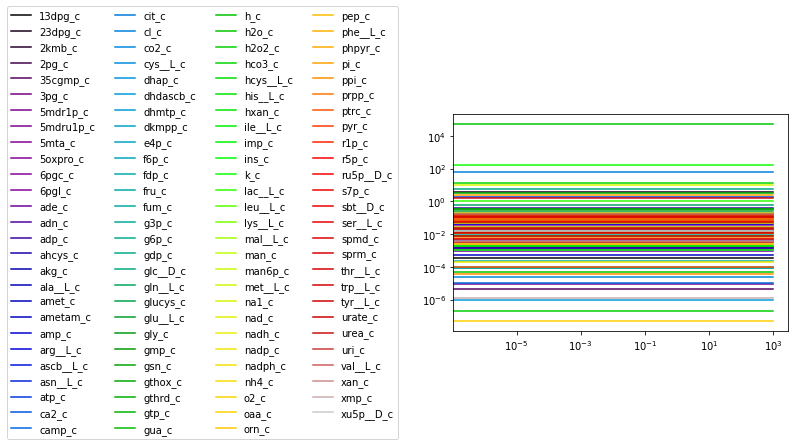

In [10]:
sim = Simulation(BASE_model, verbose=True)
conc_sol, flux_sol = sim.simulate(models=BASE_model, time=(0, 1000, 10001),
                                  verbose=True)
plot_time_profile(conc_sol, plot_function="loglog",
                  legend='left outside')

In [11]:
filepath = path.realpath(path.join("models", BASE_model.id))
json.save_json_model(mass_model=BASE_model, filename=filepath + ".json")
sbml.write_sbml_model(mass_model=BASE_model, filename=filepath + ".xml")